In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas 
from glob import glob
from scipy import stats
from sklearn.preprocessing import StandardScaler

/Users/jacobv/pls_gxp/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [451]:
df = pandas.read_csv('/Users/jacobv/Downloads/egenes_data.csv',index_col=0)
df.head()

,C1,C2,C3,keep
Blood protein levels,15,1,7,False
Total PHF-tau (SNP x SNP interaction),9,1,0,False
Exploratory eye movement dysfunction in schizophrenia (cognitive search score),2,0,0,True
Weight,2,0,0,True
Metabolite levels,3,0,0,True


In [452]:
sortdf = pandas.concat([df[(df.keep==True) & (df.C1>0)].sort_values('C1',ascending=False),
                      df[(df.keep==True) & (df.C2>0)].sort_values('C2',ascending=False),
                      df[(df.keep==True) & (df.C3>0)].sort_values('C3',ascending=False)])

<AxesSubplot:>

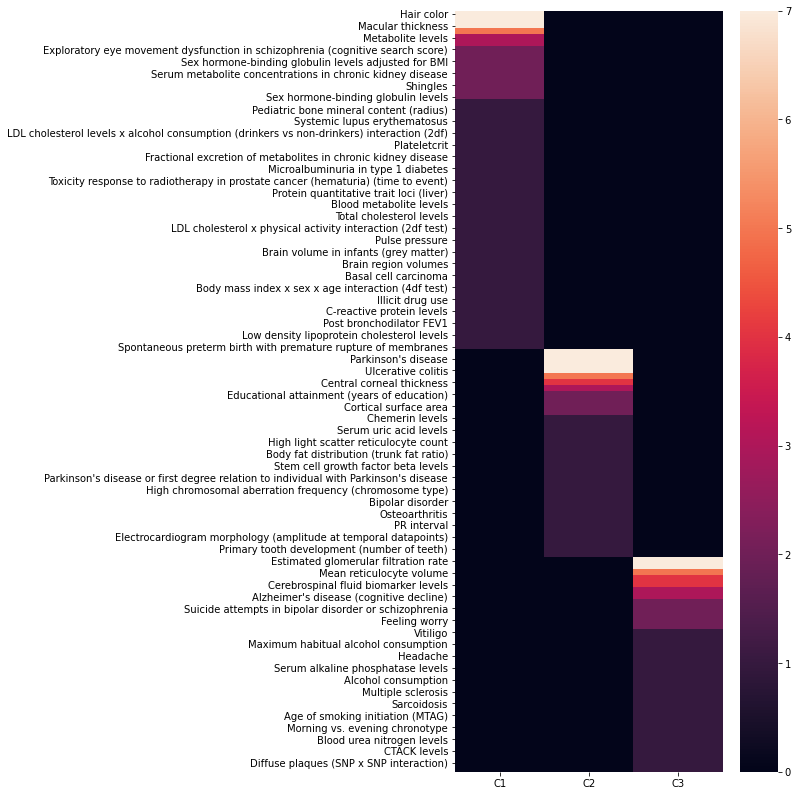

In [9]:
plt.subplots(figsize=(6,14))
sns.heatmap(sortdf[['C1','C2','C3']],vmax=7,)

<AxesSubplot:>

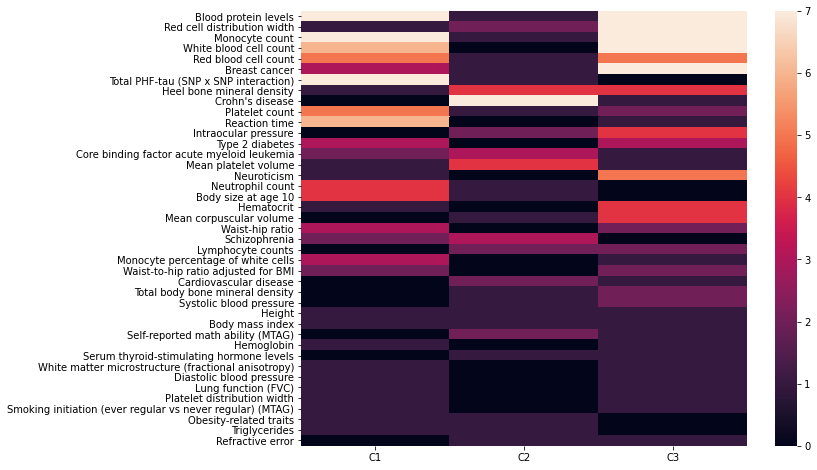

In [11]:
df.loc[:,'total_hits'] = df[['C1','C2','C3']].sum(1).values
plt.subplots(figsize=(10,8))
sns.heatmap(df[df.keep==False].sort_values('total_hits',ascending=False)[df.columns[:3]],
            vmax=7
           )

In [ ]:
# basic traits

In [453]:
keymap = {
    # traits
    'traits':{
    'basic physical traits': ['Hair color','Lobe attachment (rater-scored or self-reported)',
                             'Primary tooth development (number of teeth)',
                              'Primary tooth development (time to first tooth eruption)',
                             'Heel bone mineral density',
                              'Pediatric bone mineral content (radius)',
                             'Total body bone mineral density',],
    'Anthropometric traits': ['Anthropometric traits','Body fat distribution (leg fat ratio)',
                              'Body fat distribution (trunk fat ratio)',
                              'Body mass index (age>50)',
                              'Body mass index x sex x age interaction (4df test)',
                             'Weight','Height','Obesity-related traits',
                             'Body mass index','Body size at age 10',
                             'Waist-hip ratio','Waist-to-hip ratio adjusted for BMI',],
    'sleep': ['Chronotype','Morning vs. evening chronotype','Sleep duration',],
    'eye traits and functions': ['macular thickness',
                                'Exploratory eye movement dysfunction in schizophrenia (cognitive search score)',
                                'Intraocular pressure','Refractive error',]},
    
    # random
    'other': {
    'metabolite levels': ['Metabolite levels','Metabolic traits',
                          'Urinary metabolite levels in chronic kidney disease',
                          'Blood metabolite levels','Blood urea nitrogen levels',
                          'Estimated glomerular filtration rate',
                          'Fractional excretion of metabolites in chronic kidney disease',
                          'Serum 25-Hydroxyvitamin D levels',
                          'Serum alkaline phosphatase levels',
                          'Serum metabolite concentrations in chronic kidney disease',
                          'Serum metabolite levels',
                          'Serum uric acid levels','Triglycerides',
                         ],
    'endocrinological': ['Sex hormone-binding globulin levels adjusted for BMI',
                        'Age at menopause','Bioavailable testosterone levels',
                        'Sex hormone-binding globulin levels',
                         'Serum thyroid-stimulating hormone levels',],
    'dermatological': ['Alopecia areata','Psoriasis vulgaris', 'Vitiligo',],
    'hematology': ['Hematology traits','Hemoglobin concentration',
                  'High light scatter reticulocyte count','Mean corpuscular hemoglobin',
                   'High light scatter reticulocyte percentage of red cells',
                  'Mean spheric corpuscular volume','Plateletcrit','Blood protein levels',
                  'Hematocrit','Hemoglobin','Mean corpuscular volume','Mean platelet volume',
                   'Monocyte count','Monocyte percentage of white cells',
                  'Platelet count','Platelet distribution width',
                  'Red blood cell count','Red cell distribution width',],
    'cholesterol': ['LDL cholesterol levels','LDL cholesterol levels in current drinkers',
                    'LDL cholesterol levels x alcohol consumption (drinkers vs non-drinkers) interaction (2df)',
                    'LDL cholesterol levels x alcohol consumption (regular vs non-regular drinkers) interaction (2df)',
                    'LDL cholesterol x physical activity interaction (2df test)',
                   'Low density lipoprotein cholesterol levels','Total cholesterol levels',
                   ]},
    
    # nervous system traits
    'nervous system': {
    'brain size': ['Brain region volumes','Brain volume in infants (grey matter)',
                  'Cortical surface area','Subcortical volume (MOSTest)',],
     'neuroimmune': ['Chemerin levels',],
    'white matter': ['White matter microstructure (radial diusivities)',
                    'White matter microstructure (fractional anisotropy)'],
    'cognition / intel': ['Cognitive performance (processing speed)',
                          'General cognitive ability','Intelligence',
                         'Reaction time','Self-reported math ability (MTAG)',],
    'education': ['Educational attainment (MTAG)','Highest math class taken (MTAG)',
                  'Educational attainment (years of education)',],
    'neurovascular': ['Headache','Migraine',]},
    
    # NDD
    'NDD':{
    'AD': ["Alzheimer's disease (cognitive decline)",
           'Cerebrospinal fluid biomarker levels','Diffuse plaques (SNP x SNP interaction)',
           'Neurofibrillary tangles (SNP x SNP interaction)',
           "Rate of cognitive decline in Alzheimer's disease",
           'Total PHF-tau (SNP x SNP interaction)',
          ],
    'Other NDD': ['Multiple sclerosis','Amyotrophic lateral sclerosis'],
    'PD': ["Parkinson's disease",
           "Parkinson's disease or first degree relation to individual with Parkinson's disease",
          ]},
   
    
    # Psychiatr
    'psychiatric':{
    'Drug Abuse': ['Age of smoking initiation (MTAG)','Alcohol consumption (drinks per week)',
                  'Alcohol consumption (drinks per week)','Alcoholic chronic pancreatitis',
                  'Coffee consumption','Illicit drug use','Maximum habitual alcohol consumption',
                  'Smoking initiation (ever regular vs never regular)',
                   'Smoking initiation (ever regular vs never regular)',
                  'Smoking initiation (ever regular vs never regular) (MTAG)',],
    'Mood disorders': ['Bipolar I disorder','Bipolar disorder','Depression',
                       'Depression (broad)','Feeling guilty','Feeling worry',
                      'Major depressive disorder in trauma exposed individuals',
                      'Neurociticism','Neuroticism',],
    'Psychosis': ['Schizophrenia','Suicide attempts in bipolar disorder or schizophrenia',]},
    
    # other disease
    'other disease':{
    'heart disease or function': ['Coronary artery disease','Coronary artery disease',
                     'Atrial fibrillation',
                      'Electrocardiogram morphology (amplitude at temporal datapoints)',
                     'Global electrical heterogeneity phenotypes','PR interval',
                     'Postoperative atrial fibrillation after cardiac surgery',
                     'Pulse pressure','Severe aortic features in Marfan syndrome',
                                  'Cardiovascular disease',
                                 'Diastolic blood pressure',
                                 'Systolic blood pressure',],
    'cancer': ['Basal cell carcinoma','High-grade serous ovarian cancer',
              'Breast cancer','Core binding factor acute myeloid leukemia',
               'Toxicity response to radiotherapy in prostate cancer (hematuria) (time to event)',
              ],
    'immune': ['CTACK levels','C-reactive protein levels',
               'Lymphocyte percentage of white cells','Sarcoidosis','Lymphocyte counts',
               'Neutrophil count','White blood cell count',],
    'non-brain disease': ['Gynecologic disease',
                          "Chronic inflammatory diseases (ankylosing spondylitis, Crohn's disease, psoriasis, primary sclerosing cholangitis, ulcerative colitis) (pleiotropy)",
                         'Classic bladder exstrophy','Inflammatory bowel disease',
                         'Non-alcoholic fatty liver disease activity score in non-alcoholic fatty liver disease',
                         'Osteoarthritis','Primary biliary cirrhosis','Shingles',
                         'Systemic lupus erythematosus','Ulcerative colitis',
                         "Crohn's disease",'Lung function (FVC)'],
    'genetic disorder': ['High chromosomal aberration frequency (chromosome type)',
                        'Protein quantitative trait loci (liver)',],
    'diabetes': ['Microalbuminuria in type 1 diabetes','Type 2 diabetes',],
    'pulmonary': ['Lung function (FEV1/FVC)','Post bronchodilator FEV1',
                  'Post bronchodilator FEV1/FVC ratio',
                  'Post bronchodilator FEV1/FVC ratio in COPD',
                  'Chronic obstructive pulmonary disease',
                'Chronic obstructive pulmonary disease or high blood pressure (pleiotropy)',],
    'developmental disorder': ['Spontaneous preterm birth with premature rupture of membranes',]},
        
}

for i,row in df.iterrows():
    for main,subs in keymap.items():
        for sub,things in subs.items():
            if i in things:
                df.loc[i,'main'] = main
                df.loc[i,'subtopic'] = sub

In [454]:
code = dict(zip(df.main.unique(),range(len(df.main.unique()))))
df.loc[:,'main_code'] = [np.nan if not pandas.notnull(x) else\
                         code[x] for x in df.main.values]

code = dict(zip(df.subtopic.unique(),range(len(df.subtopic.unique()))))
df.loc[:,'subtopic_code'] = [np.nan if not pandas.notnull(x) else\
                             code[x] for x in df.subtopic.values]

In [455]:
sortr = []
done = []
main_order = ['traits','other','NDD','psychiatric','nervous system','other disease']
for topic in main_order:
    for i in range(3,0,-1):
        jnk = df[(df.main==topic) & (df['C%s'%i]>0)].sort_values('C%s'%i,ascending=True)
        goodind = [x for x in jnk.index if x not in done]
        sortr.append(jnk.loc[goodind])
        done += goodind
    
sortdf = pandas.concat(sortr)

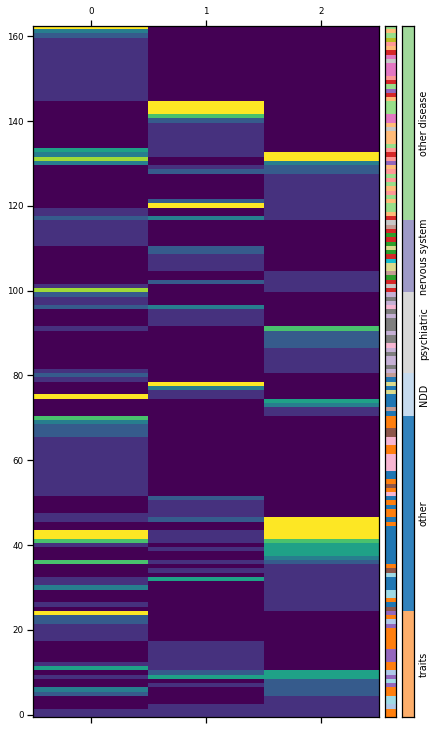

In [456]:
fig = plt.figure(figsize=(8,16))
# Add an axes at position rect [left, bottom, width, height]
#ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
# orientation='left' is reponsible for making the 
# dendrogram appear to the left
#Z1 = shc.dendrogram(Y, orientation='left')
#ax1.set_xticks([])
#ax1.set_yticks([])

# main heat-map
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
# idx1 = Z1['leaves']
# D = D[idx1, :]
# the actual heat-map
im = axmatrix.matshow(sortdf[['C1','C2','C3']],vmax=7, 
                      aspect='auto', origin='lower',) #cmap="YlGnBu")
# axmatrix.set_xticks([])
#axmatrix.set_yticks([])

ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
dxim = ax2.matshow(sortdf.subtopic_code.values.reshape(-1,1), 
                        aspect='auto', 
                        origin='lower', cmap="tab20")
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_axes([0.94, 0.1, 0.02, 0.6])
dxim = ax3.matshow(sortdf.main_code.values.reshape(-1,1), 
                        aspect='auto', 
                        origin='lower', cmap="tab20c")

ax3.set_xticks([])
ax3.set_yticks([])

sortdf.loc[:,'ind'] = range(len(sortdf))
for term in main_order:
    inds = sortdf[sortdf.main==term].ind.values
    mn = inds.mean()
    plt.text(.95,mn,term,rotation=90,va='center')
    
plt.savefig('/Users/jacobv/Science/PLS_GXP/txfer/ManuFigs/PheWAS_full.pdf',
           bbox_inches='tight')

In [88]:
sortr = []
done = []
main_order = ['traits','other','NDD','psychiatric','nervous system','other disease']
for topic in main_order:
    for i in range(1,4):
        jnk = df[(df.main==topic) & (df['C%s'%i]>0)].sort_values('C%s'%i,ascending=False)
        goodind = [x for x in jnk.index if x not in done]
        sortr.append(jnk.loc[goodind])
        done += goodind
    
sortdf = pandas.concat(sortr)

In [568]:
0.025 / 3

0.008333333333333333

In [567]:
sortdf[sortdf.main=='psychiatric']

,C1,C2,C3,C1_geneHits,C1_genes,C2_geneHits,C2_genes,C3_geneHits,C3_genes,main,subtopic,main_code,subtopic_code,ind
Opioid sensitivity,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,'HSBP1L1',psychiatric,Drug Abuse,0,2,23
Response to cognitive-behavioural therapy in anxiety disorder,1.0,1.0,1.0,1.0,'FREM3',1.0,'FREM3',1.0,'FREM3',psychiatric,Mood disorders,0,0,24
Bipolar I disorder,1.0,0.0,1.0,1.0,'MCHR1',0.0,NaN,1.0,'HAPLN4',psychiatric,Mood disorders,0,0,25
Attention deficit hyperactivity disorder symptom score,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,'HAPLN4',psychiatric,Mood disorders,0,0,26
Bipolar disorder vs major depressive disorder (ordinary least squares (OLS)),0.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,'HAPLN4',psychiatric,Mood disorders,0,0,27
Bipolar II disorder,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,'HAPLN4',psychiatric,Mood disorders,0,0,28
Bipolar disorder,2.0,0.0,3.0,2.0,"'MCHR1', 'MCHR1'",0.0,NaN,3.0,"'HAPLN4', 'HAPLN4', 'HAPLN4'",psychiatric,Mood disorders,0,0,29
Alcohol consumption (drinks per week),1.0,0.0,0.0,1.0,'FAM215B',0.0,NaN,0.0,NaN,psychiatric,Drug Abuse,0,2,30
Alcohol consumption (drinks per week) (MTAG),1.0,0.0,0.0,1.0,'FAM215B',0.0,NaN,0.0,NaN,psychiatric,Drug Abuse,0,2,31
Feeling fed-up,1.0,0.0,0.0,1.0,'FAM215B',0.0,NaN,0.0,NaN,psychiatric,Mood disorders,0,0,32


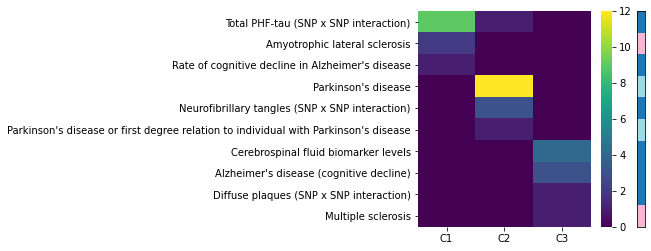

In [107]:
fig = plt.figure(figsize=(5,5))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf[sortdf.main=='NDD'][['C1','C2','C3']],cmap='viridis',vmax=12,ax=mat)
ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
labs = np.array(sortdf[sortdf.main=='NDD'].subtopic_code.tolist()[::-1]).reshape(-1,1)
dxim = ax2.matshow(labs, 
                        aspect='auto', 
                        origin='lower', cmap="tab20")
ax2.set_xticks([])
ax2.set_yticks([])

plt.savefig('/Users/jacobv/Science/PLS_GXP/txfer/ManuFigs/PheWAS_NDD.pdf',
           bbox_inches='tight')

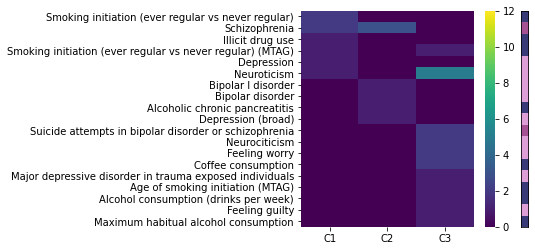

In [115]:
fig = plt.figure(figsize=(5,5))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf[sortdf.main=='psychiatric'][['C1','C2','C3']],cmap='viridis',vmax=12)
ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
labs = np.array(sortdf[sortdf.main=='psychiatric'].subtopic_code.tolist()[::-1]).reshape(-1,1)
dxim = ax2.matshow(labs, 
                        aspect='auto', 
                        origin='lower', cmap="tab20b")
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig('/Users/jacobv/Science/PLS_GXP/txfer/ManuFigs/PheWAS_psychiatr.pdf',
           bbox_inches='tight')

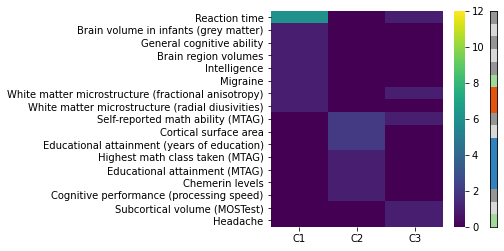

In [118]:
fig = plt.figure(figsize=(5,5))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf[sortdf.main=='nervous system'][['C1','C2','C3']],cmap='viridis',vmax=12)
ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
labs = np.array(sortdf[sortdf.main=='nervous system'].subtopic_code.tolist()[::-1]).reshape(-1,1)
dxim = ax2.matshow(labs, 
                        aspect='auto', 
                        origin='lower', cmap="tab20c_r")
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig('/Users/jacobv/Science/PLS_GXP/txfer/ManuFigs/PheWAS_brain.pdf',
           bbox_inches='tight')

In [ ]:
['traits','other','NDD','psychiatric','nervous system','other disease']

In [ ]:
im = axmatrix.matshow(sortdf[['C1','C2','C3']], aspect='auto', origin='lower', cmap="YlGnBu")

<AxesSubplot:>

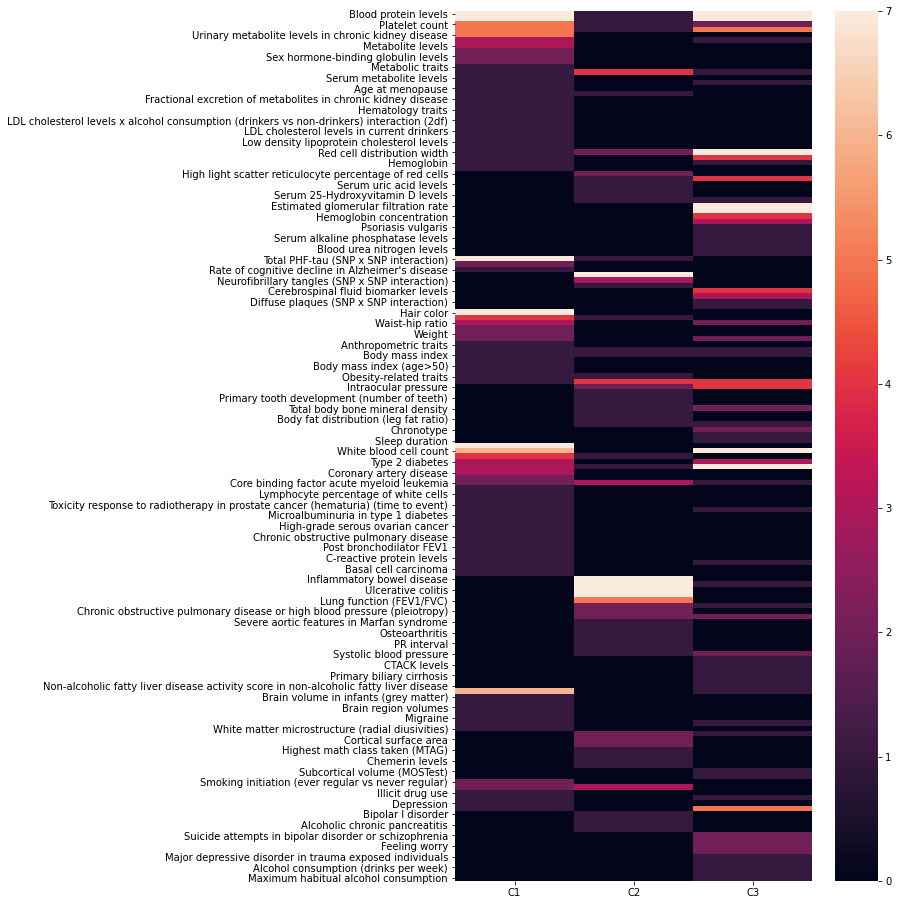

In [47]:
plt.subplots(figsize=(8,16))
sns.heatmap(sortdf[['C1','C2','C3']],vmax=7,)

In [24]:
#sortdf.sort_index().index.tolist()

In [128]:
25*1.5

37.5

In [127]:
sortdf.sort_values('C2',ascending=False).head(10)

,C1,C2,C3,keep,total_hits,main,subtopic,main_code,subtopic_code
Inflammatory bowel disease,0,24,0,True,24,other disease,non-brain disease,3.0,8.0
Parkinson's disease,0,12,0,True,12,NDD,PD,1.0,25.0
Ulcerative colitis,0,8,0,True,8,other disease,non-brain disease,3.0,8.0
"Chronic inflammatory diseases (ankylosing spondylitis, Crohn's disease, psoriasis, primary sclerosing cholangitis, ulcerative colitis) (pleiotropy)",0,8,0,True,8,other disease,non-brain disease,3.0,8.0
Crohn's disease,0,8,1,False,9,other disease,non-brain disease,3.0,8.0
Lung function (FEV1/FVC),0,5,0,True,5,other disease,pulmonary,3.0,18.0
Mean platelet volume,1,4,1,False,6,other,hematology,0.0,0.0
Heel bone mineral density,1,4,4,False,9,traits,basic physical traits,2.0,13.0
Schizophrenia,2,3,0,False,5,psychiatric,Psychosis,6.0,20.0
Neurofibrillary tangles (SNP x SNP interaction),0,3,0,True,3,NDD,AD,1.0,1.0


# Make PRS

In [23]:
eqtl = pandas.read_csv('/Users/jacobv/Science/PLS_GXP/PLS_eQTLs_GWAScat_out2.csv',
                      index_col=0)
eqtl

,snp,gene,region
1,rs144686314,A2ML1,Amygdala
2,rs116476187,AAK1,Amygdala
3,rs534039,AAMDC,Amygdala
4,rs7224108,AANAT,Amygdala
5,rs11652649,AATF,Amygdala
...,...,...,...
51775,rs13408,ZSCAN26,SubNigra
51776,rs9393908,ZSCAN31,SubNigra
51777,rs2324082,ZSWIM7,SubNigra
51778,rs61004552,ZW10,SubNigra


In [6]:
cdf = pandas.read_csv('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/PLS_GXP_CollabSpace/PLS_Component_Expr.csv')
cdf

,gene_symbol,gene_name,C1_expr,C2_expr,C3_expr
0,A1BG,alpha-1-B glycoprotein,0.001517,0.006065,-0.020001
1,A1BG-AS1,NaN,-0.006685,-0.006733,-0.002762
2,A2M,alpha-2-macroglobulin,0.005135,0.007225,0.002345
3,A2ML1,alpha-2-macroglobulin-like 1,-0.009261,-0.004295,-0.010945
4,A3GALT2,NaN,-0.001305,-0.000388,-0.000463
...,...,...,...,...,...
15628,ZXDC,ZXD family zinc finger C,0.002673,0.009308,-0.004380
15629,ZYG11B,zyg-11 homolog B (C. elegans),-0.001982,-0.009616,-0.002783
15630,ZYX,zyxin,-0.000307,-0.016673,0.006559
15631,ZZEF1,"zinc finger, ZZ-type with EF-hand domain 1",0.010242,-0.003539,0.007328


In [13]:
for i in range(1,4):
    z_scores = StandardScaler().fit_transform(cdf['C%s_expr'%i].values.reshape(-1,1))
    p_values = stats.norm.sf(abs(z_scores[:,0]))*2
    cdf.loc[:,'C%s_p'%i] = p_values

In [19]:
eqtl.region.value_counts()

Cerebellum         6943
Cerebellar_hemi    6210
Cortex             5612
Caudate            5117
NAcc               4981
FC_BA9             4460
Putamen            4321
Hippocampus        3393
ACC_BA24           3312
Hypothalamus       3259
Amygdala           2199
SubNigra           1972
Name: region, dtype: int64

In [24]:
uneqtl = pandas.DataFrame(columns=eqtl.columns)
catch = []
for i,row in eqtl.iterrows():
    if row['snp'] in catch: continue
    uneqtl.loc[i,eqtl.columns] = row.values
    catch.append(row['snp'])

In [37]:
#cdf.loc[:,'ind'] = cdf.index
cdf.index = cdf.gene_symbol.values

In [447]:
#sumstats

In [46]:
edf.loc[match,'snp']

STON1     rs62135201
STON1      rs7557600
STON1      rs4953592
STON1      rs2140551
STON1       rs940389
STON1     rs11125176
STON1     rs10865231
STON1      rs4953593
TNNT2    rs181133075
TNNT2    rs145217463
FOXG1    rs200175984
LXN        rs6786423
LXN       rs13317399
LXN        rs6763018
LXN       rs17642769
LXN        rs9817928
LXN        rs7618110
LXN        rs7613814
PRPH      rs11168967
PRPH      rs67309388
Name: snp, dtype: object

In [50]:
sumstats = {}
pvals = [1e-05,1e-04,0.001,0.01,0.05,0.1,0.5,1]
for reg in eqtl.region.values.tolist() + ['all']:
#for reg in ['all']:
    if reg != 'all':
        edf = pandas.DataFrame(eqtl[eqtl.region==reg],copy=True)
        edf.index = edf.gene.values
    else:
        edf = pandas.DataFrame(uneqtl)
        edf.index = edf.gene.values
    for c in range(1,4):
        for p in pvals:
            nm = 'C%s_%s_p=%s'%(c,reg,p)
            genelist = cdf[cdf['C%s_p'%c]<p].gene_symbol.values
            match = set(edf.gene.values) & set(genelist)
            if reg != 'all':
                sumstat = pandas.DataFrame(index = match)
            else:
                sumstat = pandas.DataFrame(index = edf.loc[match].index)
            sumstat.loc[:,'snp'] = edf.loc[match,'snp'].values
            sumstat.loc[:,'beta'] = cdf.loc[match,'C%s_expr'%c]
            sumstats.update({nm: sumstat})

In [51]:
sumstats.keys()

dict_keys(['C1_Amygdala_p=1e-05', 'C1_Amygdala_p=0.0001', 'C1_Amygdala_p=0.001', 'C1_Amygdala_p=0.01', 'C1_Amygdala_p=0.05', 'C1_Amygdala_p=0.1', 'C1_Amygdala_p=0.5', 'C1_Amygdala_p=1', 'C2_Amygdala_p=1e-05', 'C2_Amygdala_p=0.0001', 'C2_Amygdala_p=0.001', 'C2_Amygdala_p=0.01', 'C2_Amygdala_p=0.05', 'C2_Amygdala_p=0.1', 'C2_Amygdala_p=0.5', 'C2_Amygdala_p=1', 'C3_Amygdala_p=1e-05', 'C3_Amygdala_p=0.0001', 'C3_Amygdala_p=0.001', 'C3_Amygdala_p=0.01', 'C3_Amygdala_p=0.05', 'C3_Amygdala_p=0.1', 'C3_Amygdala_p=0.5', 'C3_Amygdala_p=1', 'C1_ACC_BA24_p=1e-05', 'C1_ACC_BA24_p=0.0001', 'C1_ACC_BA24_p=0.001', 'C1_ACC_BA24_p=0.01', 'C1_ACC_BA24_p=0.05', 'C1_ACC_BA24_p=0.1', 'C1_ACC_BA24_p=0.5', 'C1_ACC_BA24_p=1', 'C2_ACC_BA24_p=1e-05', 'C2_ACC_BA24_p=0.0001', 'C2_ACC_BA24_p=0.001', 'C2_ACC_BA24_p=0.01', 'C2_ACC_BA24_p=0.05', 'C2_ACC_BA24_p=0.1', 'C2_ACC_BA24_p=0.5', 'C2_ACC_BA24_p=1', 'C3_ACC_BA24_p=1e-05', 'C3_ACC_BA24_p=0.0001', 'C3_ACC_BA24_p=0.001', 'C3_ACC_BA24_p=0.01', 'C3_ACC_BA24_p=0.05', 

In [ ]:
pandas.to_pickle(sumstats,'/Users/jacobv/Science/PLS_GXP/eQTL_PRS_SumStats.pk')

In [52]:
sumstats['C2_Putamen_p=0.01']

,snp,beta
EFHC2,rs6610916,0.020974
PLSCR4,rs9876833,0.020250
SLC27A6,rs149651657,0.021500
CABP1,rs571506760,-0.020990
SHD,rs72984103,-0.025745
CENPJ,rs7981391,-0.020939
GXYLT2,rs1108154,0.029094
CD6,rs604115,0.034467
STX19,rs7432837,-0.021168
SYT6,rs400076,0.022081


In [34]:
eqtl

,snp,gene,region
1,rs144686314,A2ML1,Amygdala
2,rs116476187,AAK1,Amygdala
3,rs534039,AAMDC,Amygdala
4,rs7224108,AANAT,Amygdala
5,rs11652649,AATF,Amygdala
...,...,...,...
51775,rs13408,ZSCAN26,SubNigra
51776,rs9393908,ZSCAN31,SubNigra
51777,rs2324082,ZSWIM7,SubNigra
51778,rs61004552,ZW10,SubNigra


# Take 2 of PheWAS

In [2]:
cdf_pths = sorted(glob('/Users/jacobv/Science/PLS_GXP/PLS_eQTLs_PEC_GWAScat_C*.csv'))
cdf_pths

['/Users/jacobv/Science/PLS_GXP/PLS_eQTLs_PEC_GWAScat_C1.csv',
 '/Users/jacobv/Science/PLS_GXP/PLS_eQTLs_PEC_GWAScat_C2.csv',
 '/Users/jacobv/Science/PLS_GXP/PLS_eQTLs_PEC_GWAScat_C3.csv']

In [3]:
gtex = pandas.read_csv('/Users/jacobv/Science/PLS_GXP/egenes_GTEx_PEC_intersect.txt',
                      header=None)[0]

In [4]:
gtex

0       ENSG00000260633
1       ENSG00000144746
2       ENSG00000170837
3       ENSG00000264920
4       ENSG00000263603
             ...       
1494    ENSG00000124541
1495    ENSG00000169258
1496    ENSG00000211698
1497    ENSG00000227785
1498    ENSG00000263065
Name: 0, Length: 1499, dtype: object

In [6]:
comps = pandas.read_csv('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/PLS_GXP_CollabSpace/PLS_Component_Expr.csv')
comps.head()

,gene_symbol,gene_name,C1_expr,C2_expr,C3_expr
0,A1BG,alpha-1-B glycoprotein,0.001517,0.006065,-0.020001
1,A1BG-AS1,NaN,-0.006685,-0.006733,-0.002762
2,A2M,alpha-2-macroglobulin,0.005135,0.007225,0.002345
3,A2ML1,alpha-2-macroglobulin-like 1,-0.009261,-0.004295,-0.010945
4,A3GALT2,NaN,-0.001305,-0.000388,-0.000463


In [14]:
gene_map = pandas.read_csv('/Users/jacobv/Science/PLS_GXP/ENSG_mapp.tsv',sep='\t',header=None)
gene_map.columns = ['ensg','gene_symbol']
gene_map.head()

,ensg,gene_symbol
0,ENSG00000260633,AC010207.1
1,ENSG00000144746,ARL6IP5
2,ENSG00000170837,GPR27
3,ENSG00000264920,AC018521.5
4,ENSG00000263603,AC127024.2


In [16]:
0.025/3

0.008333333333333333

In [24]:
sig_genes = []
perc = 0.025 / 3
for i in range(1,4):
    cvec = comps.sort_values('C%s_expr'%i,ascending=True).gene_symbol.tolist()
    thresh = int(round(len(cvec) * perc))
    sig_genes += cvec[-thresh:]
    sig_genes += cvec[:thresh]

In [26]:
len(set(gene_map.gene_symbol) & set(sig_genes))

26

In [38]:
# quick and dirty
jnk = pandas.read_csv(cdf_pths[0])
alleqtls = []
# get all phenotype hits
for q,cdf_pth in enumerate(cdf_pths):
    cdf = pandas.read_csv(cdf_pth)
    cdf = cdf[cdf.gene.isin(gtex)]
    print('%s eQTLs found for C%s'%(len(cdf),(q+1)))
    alleqtls += cdf.X1.tolist()
    c = cdf_pth.split('_')[-1].split('.')[0]
    startcol = 3
    if c == 'C1':
        allhits = pandas.DataFrame(cdf.X2.value_counts())
        allhits.columns = [c]
        startcol = 4
    if c not in allhits.columns:
        allhits.loc[:,c] = np.zeros(len(allhits))
    for col in cdf.columns[startcol:]:
        vcs = cdf[col].value_counts()
        for i,val in vcs.iteritems():
            if i in allhits.index:
                allhits.loc[i,c] += val
            else:
                allhits.loc[i,c] = val
allhits = allhits.fillna(value=0)


1616 eQTLs found for C1
1644 eQTLs found for C2
2547 eQTLs found for C3


In [40]:
len(np.unique(alleqtls))

5066

In [222]:
allhits.sort_values('C1',ascending=False).head(10)

,C1,C2,C3
Feeling guilty,3.0,0.0,0.0
Neuroticism,3.0,0.0,0.0
Experiencing mood swings,2.0,0.0,0.0
Irritable mood,2.0,0.0,0.0
Bipolar disorder,2.0,0.0,3.0
Feeling miserable,2.0,0.0,0.0
Schizophrenia,2.0,0.0,0.0
Lymphocyte percentage of white cells,1.0,0.0,0.0
Feeling hurt,1.0,0.0,0.0
Educational attainment (years of education),1.0,0.0,1.0


In [22]:
cdf.columns

Index(['hgnc', 'gene', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11'],
      dtype='object')

In [20]:
cdf = pandas.read_csv(cdf_pths[0])
cdf = cdf[cdf.gene.isin(gtex)]
count = 0 # set counter
genes = [] # set container for genes
for col in cdf.columns[3:]: # go through *ALL* possible relevant columns
    if i in cdf[col].values: 
        phedf = cdf[cdf[col]==i]
        count += len(phedf.hgnc.unique())
        genes += phedf.hgnc.unique().tolist()

In [223]:
## More detailed pass
for cdf_pth in cdf_pths:
    cdf = pandas.read_csv(cdf_pth)
    cdf = cdf[cdf.gene.isin(gtex)]
    c = cdf_pth.split('_')[-1].split('.')[0]
    print('working on',c)
    for i,row in allhits.iterrows():
        count = 0
        genes = []
        for col in cdf.columns[3:]:
            if i in cdf[col].values:
                phedf = cdf[cdf[col]==i]
                count += len(phedf.hgnc.unique())
                genes += phedf.hgnc.unique().tolist()
        allhits.loc[i,'%s_geneHits'%c] = count
        if count != 0:
            allhits.loc[i,'%s_genes'%c] = str(genes).replace('[','').replace(']','')

working on C1
working on C2
working on C3


In [224]:
#allhits.to_csv('/Users/jacobv/Science/PLS_GXP/PLS_eQTLs_PEC_GWAScat_organized_GTEXInter.csv')

In [36]:
allhits = pandas.read_csv('/Users/jacobv/Science/PLS_GXP/PLS_eQTLs_PEC_GWAScat_organized_GTEXInter.csv',
                          index_col=0)

In [ ]:
['FAM215B','MCHR1','SLC17A6','PART1','PSCA','GAL','LINC01137','DESI1','DNAH5','SLN','FREM3',
'HAPLN4','GAL','HSBP1L1','ADAMTS8','KLHL7-DT','CHCHD2','GCSHP5']

In [37]:
allhits.C2_genes.value_counts()

'PSCA'         6
'GAL'          4
'LINC01137'    2
'DESI1'        2
'DNAH5'        1
'WFIKKN1'      1
'SLN'          1
'FREM3'        1
Name: C2_genes, dtype: int64

In [27]:
keymap = {
    # traits
    'traits':{
    'basic physical traits': ['Hair color','Lobe attachment (rater-scored or self-reported)',
                             'Primary tooth development (number of teeth)',
                              'Primary tooth development (time to first tooth eruption)',
                             'Heel bone mineral density',
                              'Pediatric bone mineral content (radius)',
                             'Total body bone mineral density',],
    'Anthropometric traits': ['Anthropometric traits','Body fat distribution (leg fat ratio)',
                              'Body fat distribution (trunk fat ratio)',
                              'Body mass index (age>50)',
                              'Body mass index x sex x age interaction (4df test)',
                             'Weight','Height','Obesity-related traits',
                             'Body mass index','Body size at age 10',
                             'Waist-hip ratio','Waist-to-hip ratio adjusted for BMI',],
    'sleep': ['Chronotype','Morning vs. evening chronotype','Sleep duration',],
    'eye traits and functions': ['macular thickness',
                                'Exploratory eye movement dysfunction in schizophrenia (cognitive search score)',
                                'Intraocular pressure','Refractive error',]},
    
    # random
    'other': {
    'metabolite levels': ['Metabolite levels','Metabolic traits',
                          'Urinary metabolite levels in chronic kidney disease',
                          'Blood metabolite levels','Blood urea nitrogen levels',
                          'Estimated glomerular filtration rate',
                          'Fractional excretion of metabolites in chronic kidney disease',
                          'Serum 25-Hydroxyvitamin D levels',
                          'Serum alkaline phosphatase levels',
                          'Serum metabolite concentrations in chronic kidney disease',
                          'Serum metabolite levels',
                          'Serum uric acid levels','Triglycerides',
                         ],
    'endocrinological': ['Sex hormone-binding globulin levels adjusted for BMI',
                        'Age at menopause','Bioavailable testosterone levels',
                        'Sex hormone-binding globulin levels',
                         'Serum thyroid-stimulating hormone levels',],
    'dermatological': ['Alopecia areata','Psoriasis vulgaris', 'Vitiligo',],
    'hematology': ['Hematology traits','Hemoglobin concentration',
                  'High light scatter reticulocyte count','Mean corpuscular hemoglobin',
                   'High light scatter reticulocyte percentage of red cells',
                  'Mean spheric corpuscular volume','Plateletcrit','Blood protein levels',
                  'Hematocrit','Hemoglobin','Mean corpuscular volume','Mean platelet volume',
                   'Monocyte count','Monocyte percentage of white cells',
                  'Platelet count','Platelet distribution width',
                  'Red blood cell count','Red cell distribution width',],
    'cholesterol': ['LDL cholesterol levels','LDL cholesterol levels in current drinkers',
                    'LDL cholesterol levels x alcohol consumption (drinkers vs non-drinkers) interaction (2df)',
                    'LDL cholesterol levels x alcohol consumption (regular vs non-regular drinkers) interaction (2df)',
                    'LDL cholesterol x physical activity interaction (2df test)',
                   'Low density lipoprotein cholesterol levels','Total cholesterol levels',
                   ]},
    
    # nervous system traits
    'nervous system': {
    'brain size': ['Brain region volumes','Brain volume in infants (grey matter)',
                  'Cortical surface area','Subcortical volume (MOSTest)',],
     'neuroimmune': ['Chemerin levels',],
    'white matter': ['White matter microstructure (radial diusivities)',
                    'White matter microstructure (fractional anisotropy)'],
    'cognition / intel': ['Cognitive performance (processing speed)',
                          'General cognitive ability','Intelligence',
                         'Reaction time','Self-reported math ability (MTAG)',],
    'education': ['Educational attainment (MTAG)','Highest math class taken (MTAG)',
                  'Educational attainment (years of education)',],
    'neurovascular': ['Headache','Migraine',]},
    
    # NDD
    'NDD':{
    'AD': ["Alzheimer's disease (cognitive decline)",
           'Cerebrospinal fluid biomarker levels','Diffuse plaques (SNP x SNP interaction)',
           'Neurofibrillary tangles (SNP x SNP interaction)',
           "Rate of cognitive decline in Alzheimer's disease",
           'Total PHF-tau (SNP x SNP interaction)',
          ],
    'Other NDD': ['Multiple sclerosis','Amyotrophic lateral sclerosis'],
    'PD': ["Parkinson's disease",
           "Parkinson's disease or first degree relation to individual with Parkinson's disease",
          ]},
   
    
    # Psychiatr
    'psychiatric':{
    'Drug Abuse': ['Age of smoking initiation (MTAG)','Alcohol consumption (drinks per week)',
                  'Alcohol consumption (drinks per week)','Alcoholic chronic pancreatitis',
                  'Coffee consumption','Illicit drug use','Maximum habitual alcohol consumption',
                  'Smoking initiation (ever regular vs never regular)',
                   'Smoking initiation (ever regular vs never regular)',
                  'Smoking initiation (ever regular vs never regular) (MTAG)',],
    'Mood disorders': ['Bipolar I disorder','Bipolar disorder','Depression',
                       'Depression (broad)','Feeling guilty','Feeling worry',
                      'Major depressive disorder in trauma exposed individuals',
                      'Neurociticism','Neuroticism',],
    'Psychosis': ['Schizophrenia','Suicide attempts in bipolar disorder or schizophrenia',]},
    
    # other disease
    'other disease':{
    'heart disease or function': ['Coronary artery disease','Coronary artery disease',
                     'Atrial fibrillation',
                      'Electrocardiogram morphology (amplitude at temporal datapoints)',
                     'Global electrical heterogeneity phenotypes','PR interval',
                     'Postoperative atrial fibrillation after cardiac surgery',
                     'Pulse pressure','Severe aortic features in Marfan syndrome',
                                  'Cardiovascular disease',
                                 'Diastolic blood pressure',
                                 'Systolic blood pressure',],
    'cancer': ['Basal cell carcinoma','High-grade serous ovarian cancer',
              'Breast cancer','Core binding factor acute myeloid leukemia',
               'Toxicity response to radiotherapy in prostate cancer (hematuria) (time to event)',
              ],
    'immune': ['CTACK levels','C-reactive protein levels',
               'Lymphocyte percentage of white cells','Sarcoidosis','Lymphocyte counts',
               'Neutrophil count','White blood cell count',],
        'bowel disease': ["Chronic inflammatory diseases (ankylosing spondylitis, Crohn's disease, psoriasis, primary sclerosing cholangitis, ulcerative colitis) (pleiotropy)",
                         'Classic bladder exstrophy','Inflammatory bowel disease',
                         "Crohn's disease",'Ulcerative colitis',],
    'non-brain disease': ['Gynecologic disease',  
                         'Non-alcoholic fatty liver disease activity score in non-alcoholic fatty liver disease',
                         'Osteoarthritis','Primary biliary cirrhosis','Shingles',
                         'Systemic lupus erythematosus',],
    'genetic disorder': ['High chromosomal aberration frequency (chromosome type)',
                        'Protein quantitative trait loci (liver)',],
    'diabetes': ['Microalbuminuria in type 1 diabetes','Type 2 diabetes',],
    'pulmonary': ['Lung function (FEV1/FVC)','Post bronchodilator FEV1',
                  'Post bronchodilator FEV1/FVC ratio',
                  'Post bronchodilator FEV1/FVC ratio in COPD',
                  'Chronic obstructive pulmonary disease',
                'Chronic obstructive pulmonary disease or high blood pressure (pleiotropy)',
                 'Lung function (FVC)'],
    'developmental disorder': ['Spontaneous preterm birth with premature rupture of membranes',]},
        
}



In [464]:
# allkeys = [] 
# for k,v in keymap.items():
#     allkeys += list(v.keys())
# np.array(allkeys)

In [28]:
round2 = {'Drug Abuse': ['3-hydroxypropylmercapturic acid levels in smokers',
                        'Alcohol consumption (drinks per week) (MTAG)',
                         'Alcohol use disorder (consumption score)',
                        'Bitter alcoholic beverage consumption',
                        'Caffeine consumption from coffee or tea',
                        'Cannabis dependence symptom count','Lifetime smoking index',
                        'Opioid sensitivity','Problematic alcohol use (MTAG)',
                        'Smoking cessation', 'Smoking cessation (MTAG)',
                         'Smoking initiation','Smoking status',],
          'cognition / intel': ['Abstraction and mental flexibility',
                                 'Cognitive flexibility','Cognitive performance',
                                 'Cognitive performance (MTAG)', 'Intelligence (MTAG)',
                               'Language performance in older adults (adjusted for episodic memory)',
                               'Reading or mathematical ability','Self-reported math ability',],
          'diabetes': ['Acute insulin response','Peak insulin response','Type 1 diabetes',],
          'Anthropometric traits': ['Adult body size','Appendicular lean mass',
                                   'BMI (adjusted for smoking behaviour)',
                                    'BMI in non-smokers',
                                   'Body mass index (joint analysis main effects and smoking interaction)',
                                   'Fat-free mass','Hip circumference adjusted for BMI',
                                   'Physical activity (walking duration)',
                                   'Predicted visceral adipose tissue',
                                   'Waist circumference adjusted for body mass index',
                                     'Waist-to-hip ratio adjusted for BMI (age <50)',
                                     'Waist-to-hip ratio adjusted for BMI (joint analysis for main effect and physical activity interaction)',
                                     'Waist-to-hip ratio adjusted for BMI in active individuals',
                                     'Waist-to-hip ratio adjusted for BMI x sex x age interaction (4df test)',
                                     'Waist-to-hip ratio adjusted for body mass index',],
          'pulmonary': ['Adult onset asthma and/or BMI', 
                        'Allergic disease (asthma, hay fever or eczema)',
                       'Asthma','Asthma (adult onset)','Asthma (age of onset)',
                        'Asthma (childhood onset)','Atopic asthma','FEV1',
                       'Lung function (FEV1)','Nonatopic asthma',
                         'Nonatopic asthma and/or BMI','Peak expiratory flow',
                       'Response to bronchodilator in chronic obstructive pulmonary disease (change in FEV1)',],
          'endocrinological':['Age at voice drop','Biological sex',
                             'Male puberty timing (age at voice breaking MTAG)',
                             'Male puberty timing (early vs. average onset facial hair)',
                             'Male puberty timing (early vs. average onset voice breaking)',
                             'Male puberty timing (late vs. average onset facial hair)',
                             'Male puberty timing (late vs. average onset voice breaking)',
                             'Male-pattern baldness','Menarche (age at onset)',
                             'Menopause (age at onset)','Puberty onset (breast development)',
                             'Total testosterone levels',],
          'non-brain disease': ['Age-related hearing impairment (MTAG)',
                               'Aspartate aminotransferase levels',
                               'Carpal tunnel syndrome','Disc degeneration (lumbar)',
                                'Haemorrhoidal disease','Hypothyroidism',
                               'Intrinsic epigenetic age acceleration',
                               'Itch intensity from mosquito bite adjusted by bite size',
                               'Medication use (thyroid preparations)',
                               'Mononucleosis','Parental lifespan','Periodontitis (CDC/AAP)',
                               'Renal function-related traits (BUN)',
                               'Thyroid stimulating hormone levels',
                               'Tonsillectomy','Urate levels',
                             'Urinary tract infection frequency',],
          'AD': ["Alzheimer's disease in APOE e4- carriers",
                 'Brain amyloid deposition (PET imaging)',],
          'diet': ['Oily fish consumption','Bitter beverage consumption',
                    'Bitter non-alcoholic beverage consumption',
                   'Fish- and plant-related diet','Lamb consumption','Meat-related diet',
                  'Pork consumption','Tea consumption',],
          'basic physical traits': ['Ankle injury',
                                   'Bone mineral density (paediatric, skull)',
                                   'Facial morphology (factor 17, height of vermillion upper lip)',
                                 'Facial morphology (factor 19)',
                                 'Fractures','Hand grip strength',
                                    'Heel bone mineral density (MTAG)',
                                   'Leukocyte telomere length',
                                   'Low tan response','Total body bone mineral density (MTAG)',
                                   'Youthful appearance (self-reported)'],
          'Mood disorders': ['Anorexia nervosa, attention-deficit/hyperactivity disorder, autism spectrum disorder, bipolar disorder, major depression, obsessive-compulsive disorder, schizophrenia, or Tourette syndrome (pleiotropy)',
                            'Attention deficit hyperactivity disorder',
                             'Attention deficit hyperactivity disorder symptom score',
                            'Bipolar II disorder','Bipolar disorder (MTAG)',
                             'Bipolar disorder or major depressive disorder',
                             'Bipolar disorder vs major depressive disorder (ordinary least squares (OLS))',
                            'Depressive symptoms','Experiencing mood swings',
                            'Fear of severe pain',
                             'Feeling fed-up','Feeling hurt','Feeling miserable',
                             'Feeling nervous','Feeling tense','General factor of neuroticism',
                             'General risk tolerance (MTAG)','Irritable mood',
                             'Life satisfaction','Major depressive disorder',
                             'Major depressive disorder in trauma-unexposed individuals',
                             'Major depressive disorder vs ADHD (ordinary least squares (OLS))',
                            'Positive affect','Adventurousness',
                            'Response to cognitive-behavioural therapy in anxiety disorder',
                            'Sensitivity to environmental stress and adversity',
                            'Tourette syndrome', 'Worry',
                             "Tourette's syndrome or obsessive-compulsive disorder",],
          'cholesterol': ['Apolipoprotein A-IV levels','Apolipoprotein A1 levels',
                          'Apolipoprotein B levels','HDL cholesterol',
                          'HDL cholesterol levels','HDL cholesterol levels in HIV infection',
                          'HDL cholesterol levels in current drinkers',
                          'HDL cholesterol levels x alcohol consumption (drinkers vs non-drinkers) interaction (2df)',
                          'HDL cholesterol levels x alcohol consumption (regular vs non-regular drinkers) interaction (2df)',
                          'HDL cholesterol levels x short total sleep time interaction (2df test)',
                          'LDL cholesterol levels x long total sleep time interaction (2df test)',
                         'High density lipoprotein cholesterol levels',
                         'Lipoprotein phospholipase A2 activity in cardiovascular disease',
                         'Medication use (HMG CoA reductase inhibitors)',],
          'heart disease or function': ['Arrhythmia','Blood protein levels in cardiovascular risk',
                                       'Calcific aortic valve stenosis',
                                        'Chronic venous disease','Homocysteine levels',
                                       'Medication use (agents acting on the renin-angiotensin system)',
                                       'PR interval in Tripanosoma cruzi seropositivity',
                                       'PR segment duration',
                                        'Preeclampsia (maternal genotype effect)',
                                       'Response to beta blocker use in hypertension (systolic blood pressure)',
                                        'Sudden cardiac arrest',],
          'immune': ['Autoimmune traits','Basophil count',
                     'Basophil percentage of white cells',
                    'CD6 levels','High IL-1beta levels in gingival crevicular fluid',
                    'IgG glycosylation','Interleukin-18 levels',
                     'Monokine induced by gamma interferon levels',
                    'Neonatal cytokine/chemokine levels (fetal genetic effect)',
                    'Neutrophil percentage of granulocytes',
                 'Neutrophil percentage of white cells',
                    'Response to abacavir-containing treatment in HIV-1 infection (virologic failure)',
                    'Response to efavirenz-containing treatment in HIV 1 infection (virologic failure)',
                    'Tenofovir clearance in HIV infection',],
          'cancer': ['BRCA1/2-negative high-risk breast cancer',
                     'Beta-2 microglubulin plasma levels',
                    'Bladder cancer','Breast cancer specific mortality in breast cancer',
                     'Breast cancer, ovarian cancer or prostate cancer (pleiotropy)',
                    'Cancer (pleiotropy)','Cervical cancer','Colorectal cancer',
                    'Cutaneous malignant melanoma','Cutaneous squamous cell carcinoma',
                    'E-selectin levels','Gastric cancer',
                     'First fracture in long-term childhood cancer survivors (time to event)',
                    'Gastric cancer','Keratinocyte cancer (MTAG)','Myeloid white cell count',
                    'Myeloperoxidase levels','Nevus count or cutaneous melanoma',
                    'Non-melanoma skin cancer','Oropharynx cancer','Prostate cancer',],
          'brain size': ['Brain morphology (MOSTest)','Cephalic index',
                        'Cortical surface area (MOSTest)',
                         'Cortical surface area (global PC1)',
                         'Cortical surface area (min-P)',
                        'Intracranial volume','Superior temporal gyrus volume',
                        'Third ventricle volume',],
          'eye traits and functions': ['Central corneal thickness',
                                       'Glaucoma (primary open-angle)',
                                      'Initial pursuit acceleration',
                                      'Keratoconus','Macular thickness',
                                      'Optic disc size',
                                      'Retinal nerve fibre layer (RNFL) thickness',
                                     'Retinal nerve fibre layer thickness or ganglion cell inner plexiform layer thickness (MTAG)',
                                      'Spherical equivalent or myopia (age of diagnosis)',
                                      'Vertical cup-disc ratio',],
          'education': ['Cognitive aspects of educational attainment',
                       'Highest math class taken','Household income',
                         'Household income (MTAG)',],
         'sleep':['Daytime nap','Ease of getting up in the morning','Insomnia',
                 'Morning person','Morningness','Narcolepsy',],
         'bowel disease':['Diverticular disease',
                          'Gut microbiota (bacterial taxa, rank normal transformation method)',
                         'Gut microbiota presence (family Bacteroidales S24 7group id.11173)',
                         'Peptic ulcer disease',],
         'dermatological': ['Eczema','Hay fever and/or eczema',],
          'hematology': ['Eosinophil counts','Eosinophil percentage of white cells',
                        'Granulocyte count','Granulocyte percentage of myeloid white cells',
                        'Hemoglobin levels','Immature fraction of reticulocytes',
                        'Mean corpuscular hemoglobin concentration',
                         'Mean reticulocyte volume','Non-albumin protein levels',
                        'Reticulocyte count','Reticulocyte fraction of red cells',
                        'Sum eosinophil basophil counts',
                         'Sum neutrophil eosinophil counts',],
          'metabolite levels': ['Fasting blood glucose','Glycine levels',
                               'Protein quantitative trait loci',
                               'Serum folate levels','Triglyceride levels',
                               'Triglyceride levels in current drinkers',
                                 'Triglyceride levels x alcohol consumption (drinkers vs non-drinkers) interaction (2df)',
                                 'Triglyceride levels x alcohol consumption (regular vs non-regular drinkers) interaction (2df)',
                                 'Triglyceride levels x short total sleep time interaction (2df test)',
                                 'Triglycerides x physical activity interaction (2df test)',],
          'Other NDD': ['Hippocampal sclerosis of aging',
                        'Neurological blood protein biomarker levels',],
          'neurovascular':['Intracranial aneurysm',
                           'Periventricular white matter hyperintensities',
                          'Stroke','White matter hyperintensities',],
          'Psychosis': ['Schizophrenia (MTAG)','Suicide attempts in schizophrenia',],
          'white matter': ['White matter microstructure (axial diusivities)',]
         }


In [39]:
missing = []
for topic,themes in round2.items():
    found = False
    for main,subs in keymap.items():
        if topic in subs:
            vals = keymap[main][topic]
            keymap[main].update({topic:vals + themes})
            found = True
    if not found:
        missing.append(topic)

In [42]:
keymap['traits'].update({'diet': round2['diet']})

In [41]:
missing = []
for i,row in allhits.iterrows():
    found = False
    for main,subs in keymap.items():
        for sub,things in subs.items():
            if i in things:
                allhits.loc[i,'main'] = main
                allhits.loc[i,'subtopic'] = sub
                found = True
    if not found:
        missing.append(i)

In [45]:
allhits[['main','subtopic']].to_csv('/Users/jacobv/Science/PLS_GXP/pheno_categories_for_alluvial_plots.csv')

In [470]:
code = dict(zip(allhits.main.unique(),range(len(allhits.main.unique()))))
allhits.loc[:,'main_code'] = [np.nan if not pandas.notnull(x) else\
                         code[x] for x in allhits.main.values]

code = dict(zip(allhits.subtopic.unique(),range(len(allhits.subtopic.unique()))))
allhits.loc[:,'subtopic_code'] = [np.nan if not pandas.notnull(x) else\
                             code[x] for x in allhits.subtopic.values]

In [471]:
sortr = []
done = []
main_order = ['traits','other','NDD','psychiatric','nervous system','other disease']
for topic in main_order:
    for i in range(3,0,-1):
        jnk = allhits[(allhits.main==topic) & \
                      (allhits['C%s'%i]>0)].sort_values(['C%s'%i,'subtopic'],ascending=True)
        goodind = [x for x in jnk.index if x not in done]
        sortr.append(jnk.loc[goodind])
        done += goodind
    
sortdf = pandas.concat(sortr)

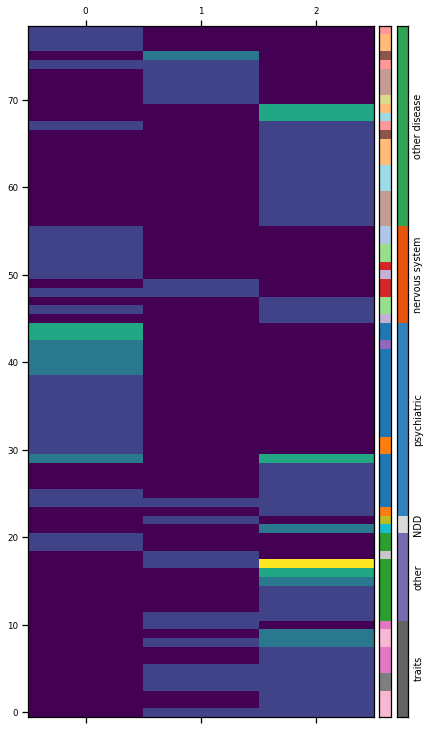

In [472]:
fig = plt.figure(figsize=(8,16))
# Add an axes at position rect [left, bottom, width, height]
#ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
# orientation='left' is reponsible for making the 
# dendrogram appear to the left
#Z1 = shc.dendrogram(Y, orientation='left')
#ax1.set_xticks([])
#ax1.set_yticks([])

# main heat-map
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
# idx1 = Z1['leaves']
# D = D[idx1, :]
# the actual heat-map
im = axmatrix.matshow(sortdf[['C1','C2','C3']],vmax=5, 
                      aspect='auto', origin='lower',) #cmap="YlGnBu")
# axmatrix.set_xticks([])
#axmatrix.set_yticks([])

ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
dxim = ax2.matshow(sortdf.subtopic_code.values.reshape(-1,1), 
                        aspect='auto', 
                        origin='lower', cmap="tab20")
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_axes([0.94, 0.1, 0.02, 0.6])
dxim = ax3.matshow(sortdf.main_code.values.reshape(-1,1), 
                        aspect='auto', 
                        origin='lower', cmap="tab20c")

ax3.set_xticks([])
ax3.set_yticks([])

sortdf.loc[:,'ind'] = range(len(sortdf))
for term in main_order:
    inds = sortdf[sortdf.main==term].ind.values
    mn = inds.mean()
    plt.text(.95,mn,term,rotation=90,va='center')
    
# plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/SubFigs/PheWAS_full.pdf',
#            bbox_inches='tight')

In [ ]:
FAM215B,MCHR1,FREM3,HAPLN4,HSBP1L1

In [566]:
set(sortdf[sortdf.main=='psychiatric'][['C1_genes','C2_genes','C3_genes']
                                  ].values.flatten())

{"'FAM215B'",
 "'FAM215B', 'FAM215B'",
 "'FAM215B', 'MCHR1'",
 "'FREM3'",
 "'HAPLN4'",
 "'HAPLN4', 'HAPLN4', 'HAPLN4'",
 "'HSBP1L1'",
 "'MCHR1'",
 "'MCHR1', 'MCHR1'",
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

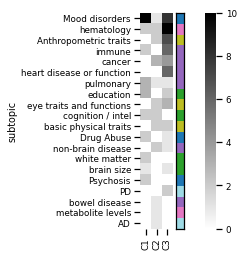

In [560]:
order = sortdf.groupby('subtopic')[['C1','C2','C3']].sum().sum(1).sort_values(ascending=False
                                                                             ).index
labdf = sortdf.groupby('subtopic')[['main_code','main']].first()

fig = plt.figure(figsize=(5,5))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf.groupby('subtopic')[['C1','C2','C3']].sum().loc[order],
            cmap='binary',vmax=10,ax=mat,square=True, cbar_kws={'pad':0.15})

ax2 = fig.add_axes([0.73, 0.1, 0.02, 0.6])
dxim = ax2.matshow(labdf.loc[order.tolist()[::-1]].main_code.values.reshape(-1,1), 
                        aspect='auto', 
                        origin='lower', cmap="tab20")
ax2.set_xticks([])
ax2.set_yticks([])

plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/SubFigs/PheWAS_condensed.pdf',
           bbox_inches='tight')

In [557]:
labdf.loc[order].main.values

array(['psychiatric', 'other', 'traits', 'other disease', 'other disease',
       'other disease', 'other disease', 'nervous system', 'traits',
       'nervous system', 'traits', 'psychiatric', 'other disease',
       'nervous system', 'nervous system', 'psychiatric', 'NDD',
       'other disease', 'other', 'NDD'], dtype=object)

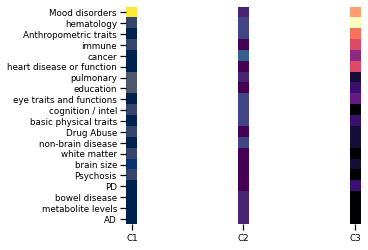

In [548]:
jnk = sortdf.groupby('subtopic')[['C1','C2','C3']].sum().loc[order]

cm = ['cividis', 'viridis', 'magma',]
f, axs = plt.subplots(1, jnk.columns.size, gridspec_kw={'wspace': 0})
for i, (s, a, c) in enumerate(zip(jnk.columns, axs, cm)):
    sns.heatmap(np.array([jnk[s].values]).T, yticklabels=jnk.index,vmax=10, 
                xticklabels=[s],square=True, ax=a, cmap=c, cbar=False)
    if i>0:
        a.yaxis.set_ticks([])

In [528]:
sortdf.C3_genes.unique()

array(["'GAL'", "'HAPLN4'", "'LINC01137'", "'GAL', 'HAPLN4'",
       "'HAPLN4', 'HAPLN4'", nan, "'SLC29A3', 'HAPLN4'",
       "'KLHL7-DT', 'HAPLN4'", "'KLHL7-DT'", "'HSBP1L1'", "'FREM3'",
       "'HAPLN4', 'HAPLN4', 'HAPLN4'", 'nan', "'GCSHP5'", "'CHCHD2'",
       "'ADAMTS8'", "'HAPLN4', nan", "'SLC29A3', 'HAPLN4', 'HAPLN4'"],
      dtype=object)

In [235]:
sortr = []
done = []
main_order = ['traits','other','NDD','psychiatric','nervous system','other disease']
for topic in main_order:
    for i in range(1,4):
        jnk = allhits[(allhits.main==topic) & (allhits['C%s'%i]>0)].sort_values(['C%s'%i,'subtopic'],
                                                                                ascending=False)
        goodind = [x for x in jnk.index if x not in done]
        sortr.append(jnk.loc[goodind])
        done += goodind
    
sortdf = pandas.concat(sortr)

[]

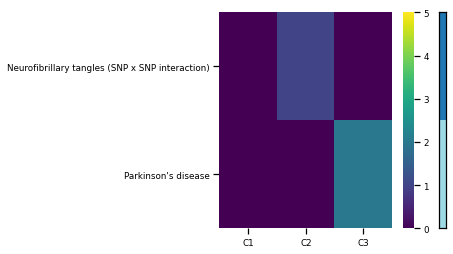

In [242]:
fig = plt.figure(figsize=(5,5))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf[sortdf.main=='NDD'][['C1','C2','C3']],cmap='viridis',vmax=5,ax=mat)
ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
labs = np.array(sortdf[sortdf.main=='NDD'].subtopic_code.tolist()[::-1]).reshape(-1,1)
dxim = ax2.matshow(labs, 
                        aspect='auto', 
                        origin='lower', cmap="tab20")
ax2.set_xticks([])
ax2.set_yticks([])

# plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/SubFigs/PheWAS_NDD.pdf',
#            bbox_inches='tight')

In [253]:
allhits.loc["Parkinson's disease"].C3_genes

"'KLHL7-DT'"

In [240]:
#jnk = sortdf.index.values
#ind = list(jnk).index('Anorexia nervosa, attention-deficit/hyperactivity disorder, autism spectrum disorder, bipolar disorder, major depression, obsessive-compulsive disorder, schizophrenia, or Tourette syndrome (pleiotropy)')
#jnk[ind] = 'Psychiatric disorders'
#sortdf.index = jnk

[]

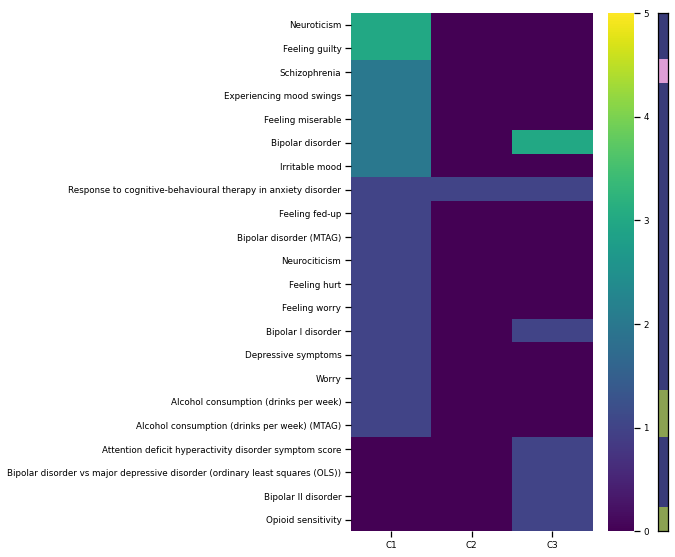

In [241]:
sns.set_context('notebook',font_scale=0.8)
fig = plt.figure(figsize=(7,12))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf[sortdf.main=='psychiatric'][['C1','C2','C3']],cmap='viridis',vmax=5)
ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
labs = np.array(sortdf[sortdf.main=='psychiatric'].subtopic_code.tolist()[::-1]).reshape(-1,1)
dxim = ax2.matshow(labs, 
                        aspect='auto', 
                        origin='lower', cmap="tab20b")
ax2.set_xticks([])
ax2.set_yticks([])
# plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/SubFigs/PheWAS_psychiatr.pdf',
#            bbox_inches='tight')

In [251]:
allhits.loc['Neuroticism'].C1_genes

"'FAM215B', 'MCHR1'"

[]

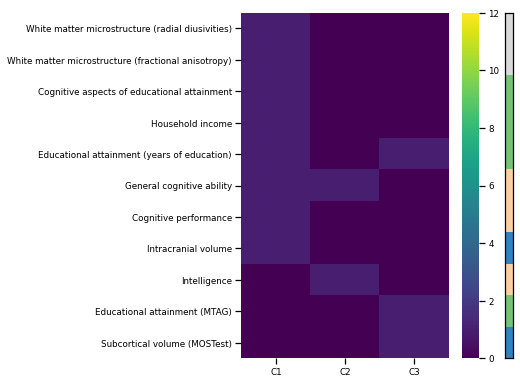

In [239]:
fig = plt.figure(figsize=(6,8))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf[sortdf.main=='nervous system'][['C1','C2','C3']],cmap='viridis',vmax=12)
ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
labs = np.array(sortdf[sortdf.main=='nervous system'].subtopic_code.tolist()[::-1]).reshape(-1,1)
dxim = ax2.matshow(labs, 
                        aspect='auto', 
                        origin='lower', cmap="tab20c_r")
ax2.set_xticks([])
ax2.set_yticks([])
# plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/SubFigs/PheWAS_brain.pdf',
#            bbox_inches='tight')

In [171]:
allhits.loc['Educational attainment (years of education)'].C2_genes

"'RRP7A', nan, 'KCNC4', 'PIGQ', 'DIAPH3', nan, 'CCDC88B', 'PIGQ', nan"

In [ ]:
c2 = pandas.read_csv('/Users/jacobv/Science/')

[]

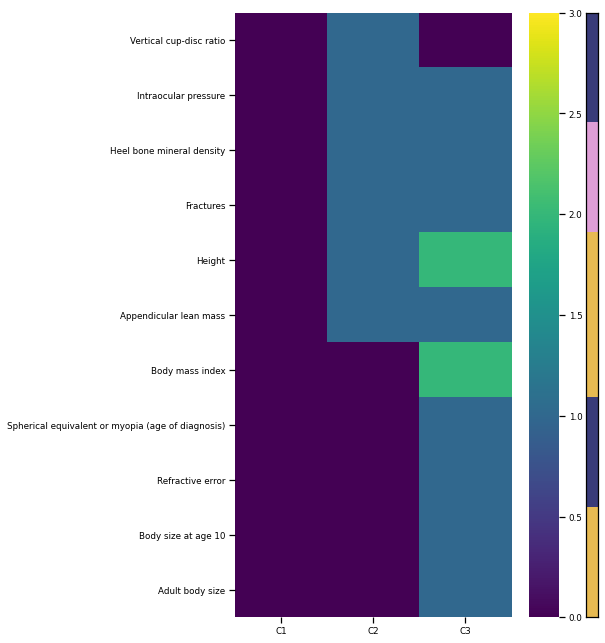

In [244]:
sns.set_context('notebook',font_scale=0.8)
fig = plt.figure(figsize=(8,14))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf[sortdf.main=='traits'][['C1','C2','C3']],cmap='viridis',vmax=3)
ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
labs = np.array(sortdf[sortdf.main=='traits'].subtopic_code.tolist()[::-1]).reshape(-1,1)
dxim = ax2.matshow(labs, 
                        aspect='auto', 
                        origin='lower', cmap="tab20b")
ax2.set_xticks([])
ax2.set_yticks([])
# plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/SubFigs/PheWAS_traits.pdf',
#            bbox_inches='tight')

[]

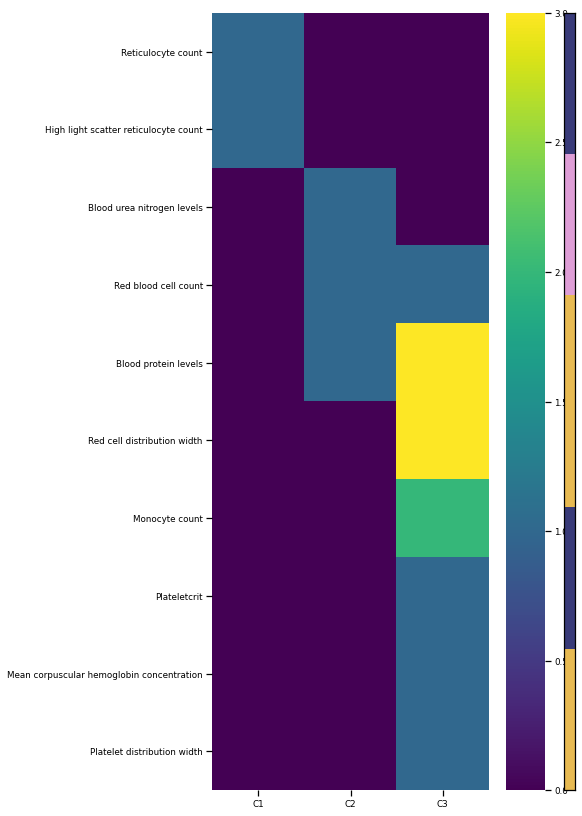

In [245]:
sns.set_context('notebook',font_scale=0.8)
fig = plt.figure(figsize=(8,18))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf[sortdf.main=='other'][['C1','C2','C3']],cmap='viridis',vmax=3)
ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
labs = np.array(sortdf[sortdf.main=='traits'].subtopic_code.tolist()[::-1]).reshape(-1,1)
dxim = ax2.matshow(labs, 
                        aspect='auto', 
                        origin='lower', cmap="tab20b")
ax2.set_xticks([])
ax2.set_yticks([])
# plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/SubFigs/PheWAS_other.pdf',
#            bbox_inches='tight')

[]

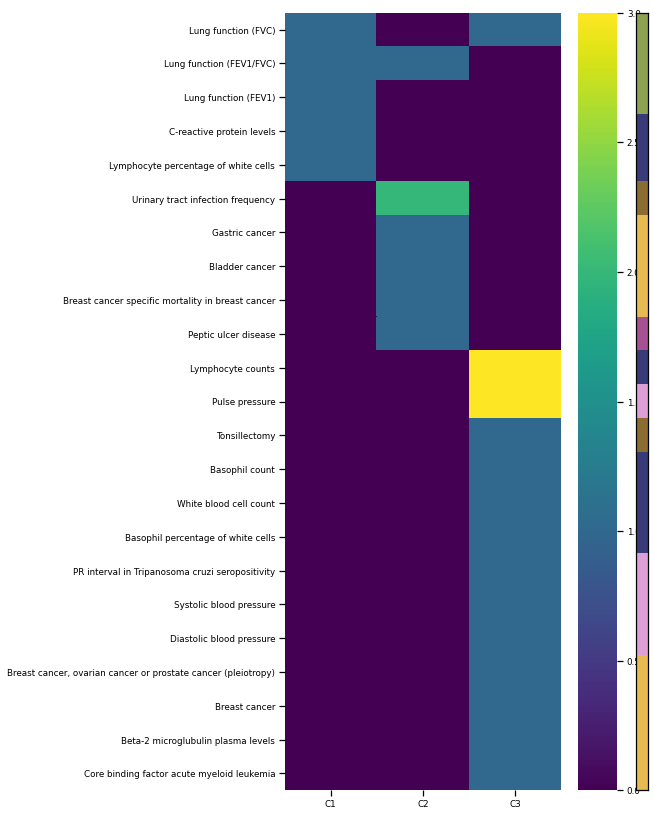

In [246]:
sns.set_context('notebook',font_scale=0.8)
fig = plt.figure(figsize=(8,18))
mat = fig.add_axes([0.3, 0.1, 0.6, 0.6])
sns.heatmap(sortdf[sortdf.main=='other disease'][['C1','C2','C3']],cmap='viridis',vmax=3)
ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.6])
labs = np.array(sortdf[sortdf.main=='other disease'].subtopic_code.tolist()[::-1]).reshape(-1,1)
dxim = ax2.matshow(labs, 
                        aspect='auto', 
                        origin='lower', cmap="tab20b")
ax2.set_xticks([])
ax2.set_yticks([])
# plt.savefig('/Users/jacobv/Dropbox/Work/Projects/PLS_ABA/Manuscript/Figs/SubFigs/PheWAS_other.pdf',
#            bbox_inches='tight')

In [418]:
c1 = pandas.read_csv(cdf_pths[0])
c2 = pandas.read_csv(cdf_pths[1])
c3 = pandas.read_csv(cdf_pths[2])

In [329]:
kgenes = ['NRP1','HRH3','CLIC5','SLC27A6','AMIGO2','HDC','CDH11','SKAP1','PTPRF',
          'LRRC36','FABP5','MEI1','SLC26A11','SGSH','DNAH14','EGFEM1P','GPX3','ZMYND10',
          'MAOB','NKAIN4','RSPO4','FERMT1','TRPS1','VAT1','VWA5A','KCNA5','RGS22','SCN7A',
          'SIX3','CXorf57','HSPB8','WDR66','DNALI1','HEYL','PCBD1','LRRN1','DBX2','HES5',
          'CD38','ME1','GPR143','PLSCR4','PCDH17','PLOD2','MGAT4C','NWD1','SLC30A10']

# C2 by development timeline

In [419]:
sortr = []
done = []
main_order = ['traits','other','NDD','psychiatric','nervous system','other disease']
for topic in main_order:
    for i in range(1,4):
        jnk = allhits[(allhits.main==topic) & (allhits['C%s'%i]>0)].sort_values(['C%s'%i,'subtopic'],
                                                                                ascending=False)
        goodind = [x for x in jnk.index if x not in done]
        sortr.append(jnk.loc[goodind])
        done += goodind
    
sortdf = pandas.concat(sortr)

In [420]:
kgenesc2 = ['HS3ST1', 'ATP4A', 'PLEKHM2', 'KCNC1', 'KCNC3', 'SCRT1', 'THEMIS',
       'PELI3', 'EIF4E1B', 'CAMK1D', 'ASB13', 'KCNG1', 'ADAMTSL1',
       'FABP5P3', 'ATP2B3', 'NDRG3', 'NFIC', 'PPFIA4', 'BEND6', 'ZBTB8A',
       'GLIS1', 'RPS6KA3', 'SECISBP2', 'SDK2', 'SEMA3C', 'ANKRD50',
       'ROBO2', 'HRH3', 'SLC4A3', 'TSPAN2', 'AMIGO2', 'SKAP1', 'SLC26A11',
       'SGSH', 'GPRIN2']
xpcat = 'fetal'
if 'C2xp_cat' not in sortdf.columns:
    sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C2xp_cat'])
phenos = {}
for x in kgenesc2:
    flathits = c2[c2.hgnc==x][c2.columns[3:]].values.flatten()
    ps = set([x for x in flathits if pandas.notnull(x)])
    phenos.update({x: ps})
    for p in ps:
        if p not in sortdf.index: continue
        val = sortdf.loc[p,'C2xp_cat']
        if pandas.notnull(val) and xpcat not in val:
            sortdf.loc[p,'C2xp_cat'] = '%s %s'%(val,xpcat)
        else:
            sortdf.loc[p,'C2xp_cat'] = xpcat

In [421]:
#phenos

In [422]:
kgenesc2 = ['IDS', 'PDIA5', 'LXN', 'SMPX', 'PPM1H', 'CTNNAL1', 'C5orf24',
       'ARL9', 'RAD54B', 'LYRM4', 'MYBPHL', 'BID', 'ST3GAL6', 'TSPAN1',
       'MICAL2', 'TBR1', 'SEMA7A', 'FAM13A', 'CPLX2', 'CNKSR2', 'ATP2B2',
       'CABP1', 'COX7A1', 'KLF13', 'UBE2QL1', 'WISP2', 'FABP5', 'GPX3',
       'ADCYAP1R1', 'PITPNC1', 'CYB5R1', 'MT1F', 'RYR3', 'ITPKC', 'FRAT1',
       'FRAT2', 'CUX1', 'DSP', 'ARSG', 'LPP', 'SLC38A11', 'FES', 'RCSD1',
       'PCSK5', 'NTSR1', 'SLC35F2', 'PAX8', 'SYT6', 'IL17RD', 'ADAMTS9',
       'NAV2', 'TSKU', 'AEBP1', 'SLC27A6', 'PRRX1', 'TGFBI', 'COL21A1',
       'APLNR', 'GXYLT2', 'NUPR1', 'THBD', 'TCEA3', 'CENPJ', 'CCDC88B',
       'SYCP2', 'COL27A1']
xpcat = 'infant'
if 'C2xp_cat' not in sortdf.columns:
    sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C2xp_cat'])
phenos = {}
for x in kgenesc2:
    flathits = c2[c2.hgnc==x][c2.columns[3:]].values.flatten()
    ps = set([x for x in flathits if pandas.notnull(x)])
    phenos.update({x: ps})
    for p in ps:
        if p not in sortdf.index: continue
        val = sortdf.loc[p,'C2xp_cat']
        if pandas.notnull(val) and xpcat not in val:
            sortdf.loc[p,'C2xp_cat'] = '%s %s'%(val,xpcat)
        else:
            sortdf.loc[p,'C2xp_cat'] = xpcat

In [423]:
#phenos

In [424]:
# kgenesc2 = ['DSP', 'ARSG', 'LPP', 'CENPJ', 'CCDC88B', 'SLC38A11', 'FES',
#        'SYCP2', 'COL27A1', 'RCSD1', 'NRP1', 'CLIC5', 'FOXF2', 'CDH11',
#        'PTPRF']
# xpcat = 'child'
# if 'C2xp_cat' not in sortdf.columns:
#     sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C2xp_cat'])
# phenos = {}
# for x in kgenesc2:
#     flathits = c2[c2.hgnc==x][c2.columns[3:]].values.flatten()
#     ps = set([x for x in flathits if pandas.notnull(x)])
#     phenos.update({x: ps})
#     for p in ps:
#         if p not in sortdf.index: continue
#         val = sortdf.loc[p,'C2xp_cat']
#         if pandas.notnull(val) and xpcat not in val:
#             sortdf.loc[p,'C2xp_cat'] = '%s %s'%(val,xpcat)
#         else:
#             sortdf.loc[p,'C2xp_cat'] = xpcat

In [425]:
kgenesc2 = ['ARHGAP4', 'GRP', 'WTIP', 'ST20', 'PRR5', 'SCN1B', 'TFAM', 'DCPS',
       'NNMT', 'KCNAB3', 'RTKN2', 'PRC1', 'ENOX1', 'SOX11', 'CACNA1H',
       'DDAH2']
xpcat = 'postchild'
if 'C2xp_cat' not in sortdf.columns:
    sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C2xp_cat'])
phenos = {}
for x in kgenesc2:
    flathits = c2[c2.hgnc==x][c2.columns[3:]].values.flatten()
    ps = set([x for x in flathits if pandas.notnull(x)])
    phenos.update({x: ps})
    for p in ps:
        if p not in sortdf.index: continue
        val = sortdf.loc[p,'C2xp_cat']
        if pandas.notnull(val) and xpcat not in val:
            sortdf.loc[p,'C2xp_cat'] = '%s %s'%(val,xpcat)
        else:
            sortdf.loc[p,'C2xp_cat'] = xpcat

In [426]:
sortdf.C2xp_cat.value_counts()

infant              13
fetal                2
fetal infant         2
infant postchild     1
Name: C2xp_cat, dtype: int64

In [427]:
sortdf[sortdf.C2xp_cat=='infant postchild']

,C1,C2,C3,C1_geneHits,C1_genes,C2_geneHits,C2_genes,C3_geneHits,C3_genes,main,subtopic,main_code,subtopic_code,C2xp_cat
White blood cell count,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,'LINC01137',other disease,immune,2,3,infant postchild


In [428]:
sortdf[sortdf.C2xp_cat=='fetal']

,C1,C2,C3,C1_geneHits,C1_genes,C2_geneHits,C2_genes,C3_geneHits,C3_genes,main,subtopic,main_code,subtopic_code,C2xp_cat
Height,0.0,1.0,2.0,0.0,NaN,1.0,'GAL',2.0,"'GAL', 'HAPLN4'",traits,Anthropometric traits,4,13,fetal
Breast cancer,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,'HAPLN4',other disease,cancer,2,11,fetal


# C1 by development timeline

In [429]:
kgenesc2 = ['KLHL13', 'TMTC4', 'AMDHD1', 'GRID2', 'VAT1L', 'BID', 'KCNG1',
       'NTSR1', 'ENOX1', 'TBR1', 'ANKRD50', 'CABP1', 'THEMIS', 'UBE2QL1',
       'RASL12', 'SPARC', 'GFAP', 'ARSG', 'AQP1', 'SLC35F2', 'TSKU']
xpcat = 'fetal'
if 'C1xp_cat' not in sortdf.columns:
    sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C1xp_cat'])
phenos = {}
for x in kgenesc2:
    flathits = c1[c1.hgnc==x][c1.columns[3:]].values.flatten()
    ps = set([x for x in flathits if pandas.notnull(x)])
    phenos.update({x: ps})
    for p in ps:
        if p not in sortdf.index: continue
        val = sortdf.loc[p,'C1xp_cat']
        if pandas.notnull(val) and xpcat not in val:
            sortdf.loc[p,'C1xp_cat'] = '%s %s'%(val,xpcat)
        else:
            sortdf.loc[p,'C1xp_cat'] = xpcat

In [430]:
#phenos

In [431]:
kgenesc2 = ['NRP1', 'CLIC5', 'TSPAN2', 'CDH11', 'HTR7', 'SCN9A', 'MGAT4C',
       'ATP4A', 'KLF9', 'NR1D1', 'KCNC1', 'SCRT1', 'ASB13', 'ARL9']
xpcat = 'infant'
if 'C1xp_cat' not in sortdf.columns:
    sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C1xp_cat'])
phenos = {}
for x in kgenesc2:
    flathits = c1[c1.hgnc==x][c1.columns[3:]].values.flatten()
    ps = set([x for x in flathits if pandas.notnull(x)])
    phenos.update({x: ps})
    for p in ps:
        if p not in sortdf.index: continue
        val = sortdf.loc[p,'C1xp_cat']
        if pandas.notnull(val) and xpcat not in val:
            sortdf.loc[p,'C1xp_cat'] = '%s %s'%(val,xpcat)
        else:
            sortdf.loc[p,'C1xp_cat'] = xpcat

In [432]:
#phenos

In [433]:
kgenesc2 = ['CADPS2', 'NIPAL2', 'NR3C1', 'ARHGAP26', 'RASIP1', 'NFIC', 'SGSH',
       'EGFEM1P', 'DDAH2']
xpcat = 'child'
if 'C1xp_cat' not in sortdf.columns:
    sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C1xp_cat'])
phenos = {}
for x in kgenesc2:
    flathits = c1[c1.hgnc==x][c1.columns[3:]].values.flatten()
    ps = set([x for x in flathits if pandas.notnull(x)])
    phenos.update({x: ps})
    for p in ps:
        if p not in sortdf.index: continue
        val = sortdf.loc[p,'C1xp_cat']
        if pandas.notnull(val) and xpcat not in val:
            sortdf.loc[p,'C1xp_cat'] = '%s %s'%(val,xpcat)
        else:
            sortdf.loc[p,'C1xp_cat'] = xpcat

In [434]:
#phenos

In [435]:
kgenesc2 = ['ST3GAL6', 'ADAMTS9', 'FABP5P3', 'LAG3', 'RSPO4', 'SHD', 'SCN1B',
       'VAV3', 'CHODL', 'TSPAN33', 'PLXDC1', 'MEI1', 'KCND3', 'LRRN1',
       'TMEM132E', 'KCTD8', 'TUBA8', 'DSP', 'AEBP1', 'PRRX1', 'TGFBI',
       'APLNR', 'FOXF2', 'THBD', 'MYO19', 'MST1R', 'CACNA1H', 'RYR3']
xpcat = 'postchild'
if 'C1xp_cat' not in sortdf.columns:
    sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C1xp_cat'])
phenos = {}
for x in kgenesc2:
    flathits = c1[c1.hgnc==x][c1.columns[3:]].values.flatten()
    ps = set([x for x in flathits if pandas.notnull(x)])
    phenos.update({x: ps})
    for p in ps:
        if p not in sortdf.index: continue
        val = sortdf.loc[p,'C1xp_cat']
        if pandas.notnull(val) and xpcat not in val:
            sortdf.loc[p,'C1xp_cat'] = '%s %s'%(val,xpcat)
        else:
            sortdf.loc[p,'C1xp_cat'] = xpcat

In [436]:
#phenos

In [437]:
sortdf.C1xp_cat.value_counts()

postchild    1
infant       1
Name: C1xp_cat, dtype: int64

In [438]:
sortdf[sortdf.C1xp_cat=='infant']

,C1,C2,C3,C1_geneHits,C1_genes,C2_geneHits,C2_genes,C3_geneHits,C3_genes,main,subtopic,main_code,subtopic_code,C2xp_cat,C1xp_cat
Red blood cell count,0.0,1.0,1.0,0.0,NaN,1.0,'LINC01137',1.0,'LINC01137',other,hematology,3,4,infant,infant


In [439]:
sortdf[sortdf.C1xp_cat=='postchild']

,C1,C2,C3,C1_geneHits,C1_genes,C2_geneHits,C2_genes,C3_geneHits,C3_genes,main,subtopic,main_code,subtopic_code,C2xp_cat,C1xp_cat
Tonsillectomy,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,'HAPLN4',other disease,non-brain disease,2,10,infant,postchild


# C3 by development timeline

In [401]:
# kgenesc2 = ['KLHL13', 'TMTC4', 'AMDHD1', 'GRID2', 'VAT1L', 'BID', 'KCNG1',
#        'NTSR1', 'ENOX1', 'TBR1', 'ANKRD50', 'CABP1', 'THEMIS', 'UBE2QL1',
#        'RASL12', 'SPARC', 'GFAP', 'ARSG', 'AQP1', 'SLC35F2', 'TSKU']
# xpcat = 'fetal'
# if 'C1xp_cat' not in sortdf.columns:
#     sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C1xp_cat'])
# phenos = {}
# for x in kgenesc2:
#     flathits = c1[c1.hgnc==x][c1.columns[3:]].values.flatten()
#     ps = set([x for x in flathits if pandas.notnull(x)])
#     phenos.update({x: ps})
#     for p in ps:
#         if p not in sortdf.index: continue
#         val = sortdf.loc[p,'C1xp_cat']
#         if pandas.notnull(val) and xpcat not in val:
#             sortdf.loc[p,'C1xp_cat'] = '%s %s'%(val,xpcat)
#         else:
#             sortdf.loc[p,'C1xp_cat'] = xpcat

In [403]:
#phenos

In [440]:
kgenesc2 = ['LXN', 'CCDC47', 'ISLR', 'LPP', 'PITPNC1', 'SLC38A11', 'RPS6KA3',
       'C5orf24', 'FES', 'NDRG3', 'PPFIA4', 'ATP2B2', 'KCND3']
xpcat = 'infant'
if 'C3xp_cat' not in sortdf.columns:
    sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C3xp_cat'])
phenos = {}
for x in kgenesc2:
    flathits = c3[c3.hgnc==x][c3.columns[3:]].values.flatten()
    ps = set([x for x in flathits if pandas.notnull(x)])
    phenos.update({x: ps})
    for p in ps:
        if p not in sortdf.index: continue
        val = sortdf.loc[p,'C3xp_cat']
        if pandas.notnull(val) and xpcat not in val:
            sortdf.loc[p,'C3xp_cat'] = '%s %s'%(val,xpcat)
        else:
            sortdf.loc[p,'C3xp_cat'] = xpcat

In [441]:
phenos

{'LXN': set(),
 'CCDC47': set(),
 'ISLR': set(),
 'LPP': set(),
 'PITPNC1': set(),
 'SLC38A11': set(),
 'RPS6KA3': set(),
 'C5orf24': set(),
 'FES': set(),
 'NDRG3': set(),
 'PPFIA4': set(),
 'ATP2B2': set(),
 'KCND3': set()}

In [442]:
kgenesc2 = ['SLC35F2', 'GRP', 'TSKU', 'COL21A1', 'KCNA5', 'TSPAN2', 'SCN7A',
       'FABP6', 'NUPR1', 'NR2F2', 'CTXN3', 'MICAL2', 'CPLX2', 'ZBTB8A',
       'KLF13', 'SYN3', 'SECISBP2']
xpcat = 'child'
if 'C3xp_cat' not in sortdf.columns:
    sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C3xp_cat'])
phenos = {}
for x in kgenesc2:
    flathits = c3[c3.hgnc==x][c3.columns[3:]].values.flatten()
    ps = set([x for x in flathits if pandas.notnull(x)])
    phenos.update({x: ps})
    for p in ps:
        if p not in sortdf.index: continue
        val = sortdf.loc[p,'C3xp_cat']
        if pandas.notnull(val) and xpcat not in val:
            sortdf.loc[p,'C3xp_cat'] = '%s %s'%(val,xpcat)
        else:
            sortdf.loc[p,'C3xp_cat'] = xpcat

In [443]:
phenos

{'SLC35F2': set(),
 'GRP': set(),
 'TSKU': set(),
 'COL21A1': set(),
 'KCNA5': set(),
 'TSPAN2': set(),
 'SCN7A': set(),
 'FABP6': set(),
 'NUPR1': set(),
 'NR2F2': set(),
 'CTXN3': set(),
 'MICAL2': set(),
 'CPLX2': set(),
 'ZBTB8A': set(),
 'KLF13': set(),
 'SYN3': set(),
 'SECISBP2': set()}

In [444]:
# kgenesc2 = ['ST3GAL6', 'ADAMTS9', 'FABP5P3', 'LAG3', 'RSPO4', 'SHD', 'SCN1B',
#        'VAV3', 'CHODL', 'TSPAN33', 'PLXDC1', 'MEI1', 'KCND3', 'LRRN1',
#        'TMEM132E', 'KCTD8', 'TUBA8', 'DSP', 'AEBP1', 'PRRX1', 'TGFBI',
#        'APLNR', 'FOXF2', 'THBD', 'MYO19', 'MST1R', 'CACNA1H', 'RYR3']
# xpcat = 'postchild'
# if 'C1xp_cat' not in sortdf.columns:
#     sortdf = sortdf.reindex(columns=sortdf.columns.tolist() + ['C1xp_cat'])
# phenos = {}
# for x in kgenesc2:
#     flathits = c1[c1.hgnc==x][c1.columns[3:]].values.flatten()
#     ps = set([x for x in flathits if pandas.notnull(x)])
#     phenos.update({x: ps})
#     for p in ps:
#         if p not in sortdf.index: continue
#         val = sortdf.loc[p,'C1xp_cat']
#         if pandas.notnull(val) and xpcat not in val:
#             sortdf.loc[p,'C1xp_cat'] = '%s %s'%(val,xpcat)
#         else:
#             sortdf.loc[p,'C1xp_cat'] = xpcat

In [412]:
#phenos

In [446]:
sortdf.C3xp_cat.value_counts()

Series([], Name: C3xp_cat, dtype: int64)